In [1]:
# ========================
# 📌 1. IMPORT LIBRARIES
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib


In [5]:
# ========================
# 📌 2. LOAD DATASET
# ========================
df = pd.read_csv("diabetes.csv")  # Make sure this CSV is in the same folder
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# ========================
# 📌 3. CLEAN DATA
# ========================
cols_to_clean = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_clean] = df[cols_to_clean].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)


In [7]:
# ========================
# 📌 4. SPLIT FEATURES & LABEL
# ========================
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# ========================
# 📌 5. BALANCE CLASSES (SMOTE)
# ========================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [18]:
# ========================
# 📌 6. TRAIN / TEST SPLIT
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# ========================
# 📌 7. FEATURE SCALING
# ========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# ========================
# 📌 8. TRAIN XGBOOST MODEL
# ========================
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

/home/genesix/Documents/gestational-diabities-ml/venv/lib64/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:41:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# ========================
# 📌 9. PREDICT
# ========================
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [11]:
# ========================
# 📌 10. EVALUATION
# ========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
print(f"✅ F1 Score: {f1:.2f}")
print(f"✅ ROC AUC: {roc_auc:.2f}")


✅ Accuracy: 0.79
✅ Precision: 0.74
✅ Recall: 0.88
✅ F1 Score: 0.81
✅ ROC AUC: 0.86


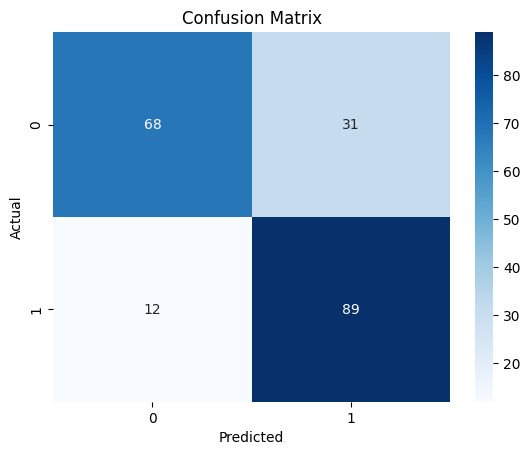

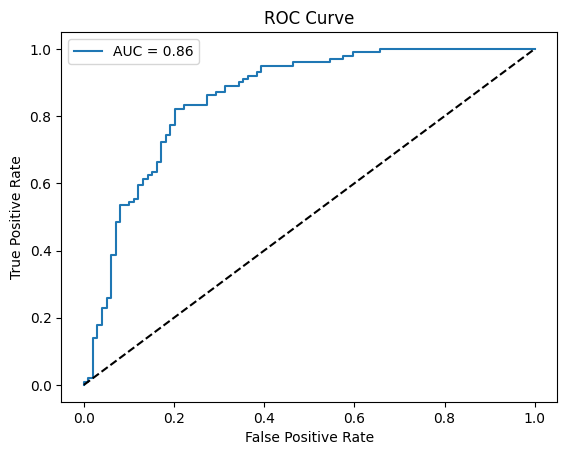

In [12]:
# ========================
# 📌 11. PLOT CONFUSION MATRIX
# ========================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ========================
# 📌 12. PLOT ROC CURVE
# ========================
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
# ========================
# 📌 13. SAVE MODEL & SCALER
# ========================
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved.")


✅ Model and scaler saved.
